In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 26 22:15:45 2018

@author: Ann
"""

import warnings
warnings.filterwarnings('ignore')
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Evaluating the ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Input
from keras.models import Model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import LSTM
from keras.layers import Dropout
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#reading all the base data and appending it to a single data frame
filenames= os.listdir ('D:/project/anurakta/39A_segments/39A_segments') 
# get all files' and folders' names in the current directory
base_data=[]
for file in filenames:
    new =os.path.join(os.path.abspath('D:/project/anurakta/39A_segments/39A_segments'), file)
    base=pd.read_csv(new,names=["dur","time","from_to","day","rains","temp"])
    base_data.append(base)
   

In [3]:
#creating an empty data frame with the corresponding columns names#
column_names=("dur","time","from_to","day","rains","temp")
df = pd.DataFrame(columns=column_names)

In [4]:
#appending the dataframe to df
for dataframe in base_data:
    #print(dataframe.head)
    df = df.append(dataframe)
   

In [6]:
#printing the sample dataframe
df.head(100)

,dur,time,from_to,day,rains,temp
0,43031,66,1443_1444,Thursday,0.0,8.2
1,65724,64,1443_1444,Tuesday,0.0,11.4
2,52720,83,1443_1444,Tuesday,0.0,11.3
3,57973,57,1443_1444,Saturday,0.0,12.6
4,51393,74,1443_1444,Thursday,0.0,15.7
5,44541,68,1443_1444,Friday,0.0,7.8
6,55245,58,1443_1444,Sunday,0.0,18.8
7,30458,72,1443_1444,Saturday,0.0,13.9
8,63271,79,1443_1444,Tuesday,0.0,4.0
9,55645,81,1443_1444,Tuesday,0.0,11.9


In [7]:
#to check the length of the data frame#
len(df)

2022193

In [67]:
#to check the data type in the data frame
df.dtypes

dur         object
time        object
from_to     object
day         object
rains      float64
temp       float64
dtype: object

In [68]:
df.columns

Index(['dur', 'time', 'from_to', 'day', 'rains', 'temp'], dtype='object')

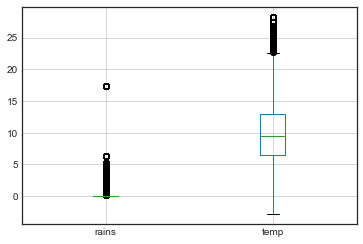

In [73]:
#plotting the box plot for all the numerical variables#
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
boxplot = df.boxplot()

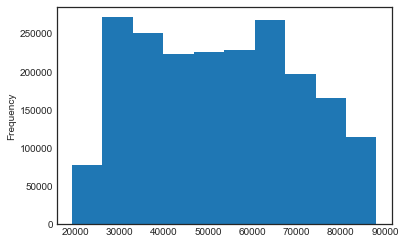

In [81]:
#plotting the distribution of the variable duration#
df['dur'].plot(kind='hist')

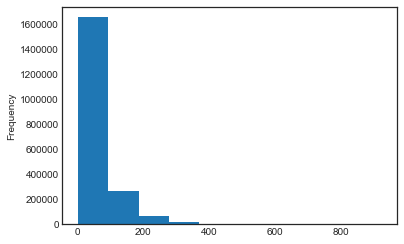

In [82]:
#plotting the distribution of the variable time# highly left skewed
df['time'].plot(kind='hist')

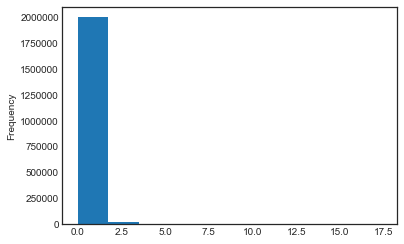

In [86]:
#plotting the distribution of the variable rains# 
df['rains'].plot(kind='hist')

In [8]:
#creating the features for each day variables
New_base=pd.get_dummies(df, columns=["day"], prefix=["day"])
print(New_base.columns)

Index(['dur', 'time', 'from_to', 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')


In [12]:
#the final modelling data is created
Final_base_data=New_base[['dur', 'time', 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday']]


In [10]:
#to check for nulls in the dataframe
print(Final_base_data.isnull().sum())
Final_base_data=Final_base_data.fillna(0)
dataset = Final_base_data

dur                0
time               0
rains            978
temp               0
day_Friday         0
day_Monday         0
day_Saturday       0
day_Sunday         0
day_Thursday       0
day_Tuesday        0
day_Wednesday      0
dtype: int64


In [53]:
#to check for data type
dataset.dtypes

dur                int64
time               int64
rains            float64
temp             float64
day_Friday         uint8
day_Monday         uint8
day_Saturday       uint8
day_Sunday         uint8
day_Thursday       uint8
day_Tuesday        uint8
day_Wednesday      uint8
dtype: object

In [11]:
#verifying the column names in the dataframe
dataset.columns

Index(['dur', 'time', 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

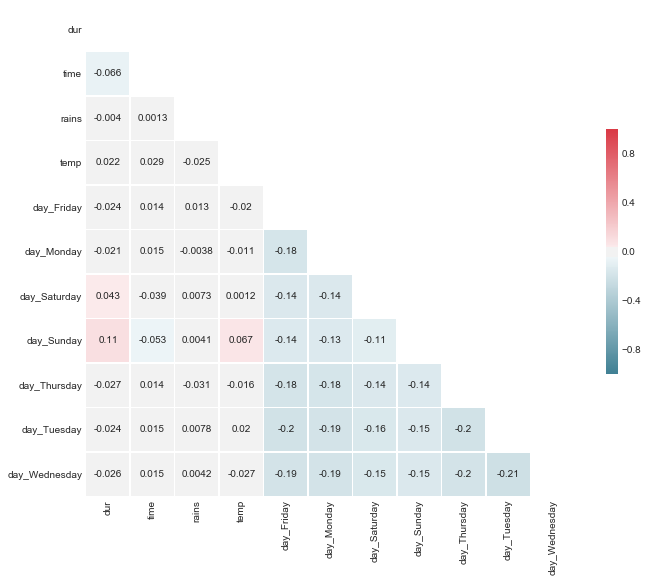

In [13]:
#correlation chart for all the variables showing clear pattern#

sns.set_style("white")
cont_corr = dataset.corr()
mask = np.zeros_like(cont_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(220,10, as_cmap = True)
sns.heatmap(cont_corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, xticklabels=True, yticklabels=True, linewidths=.5, cbar_kws={"shrink": .5})

In [75]:
dataset.columns

Index(['dur', 'time', 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

In [87]:
#checking the sample dataset dataframe
dataset.head()

,dur,time,rains,temp,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,43031,66,0.0,8.2,0,0,0,0,1,0,0
1,65724,64,0.0,11.4,0,0,0,0,0,1,0
2,52720,83,0.0,11.3,0,0,0,0,0,1,0
3,57973,57,0.0,12.6,0,0,1,0,0,0,0
4,51393,74,0.0,15.7,0,0,0,0,1,0,0


In [14]:
X=dataset[[ 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday']].values
y=dataset['time'].values

In [89]:
#check for clustering these data points together
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)


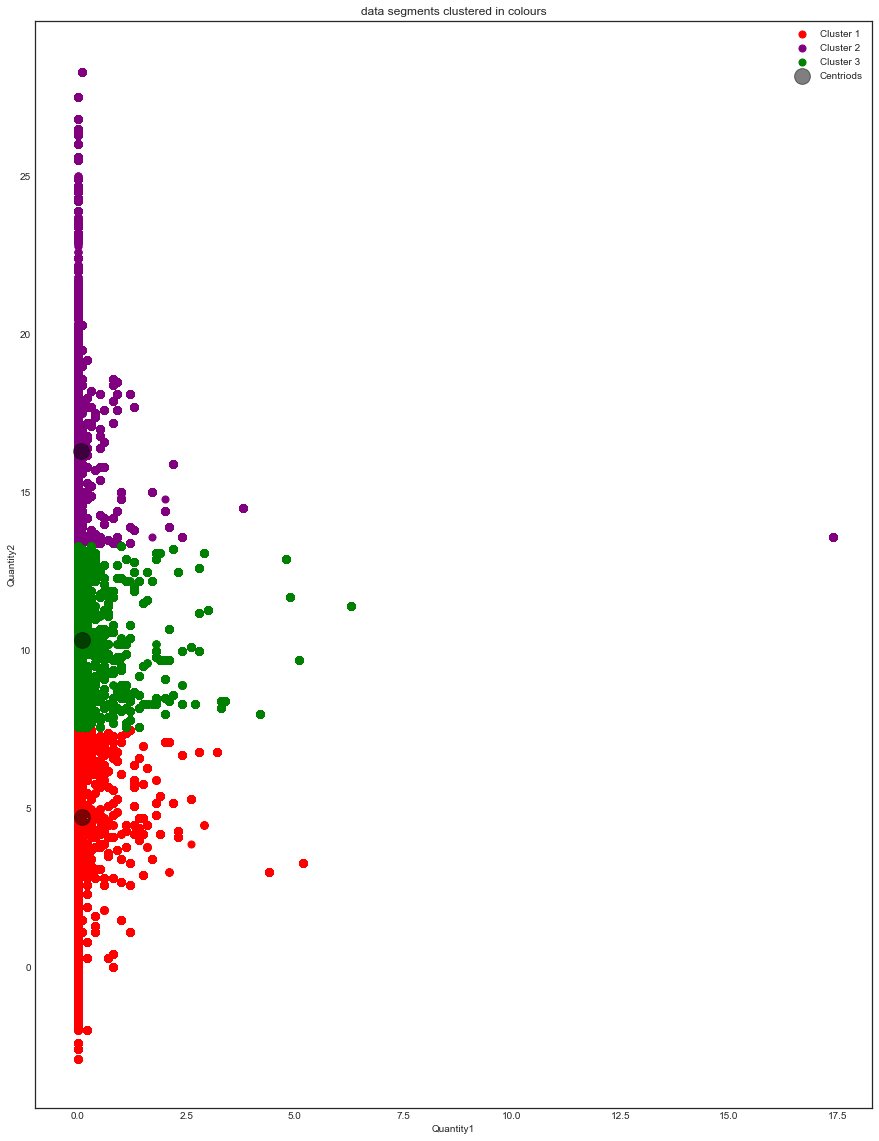

In [90]:
#plotting the clusters showing that the 3 cluters are quite similar
y_kmeans = kmeans.fit_predict(X)
fig = plt.figure(figsize=(15,20))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'purple', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

# The centriod attributes returns the coordinate of the centriods
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=250, alpha=0.5, cmap='viridis', label='Centriods');

plt.title('data segments clustered in colours')
plt.xlabel('Quantity1')
plt.ylabel('Quantity2')
plt.legend()
plt.show()

In [15]:
#testing linear regression #

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X_new = sm.add_constant(X_train)
model = sm.OLS(y_train,X_new).fit()
print(model.params.tolist())


[-56662423981.53569, 0.12097189381883486, 0.3820840751915747, 56662424049.155136, 56662424049.3161, 56662424040.62412, 56662424037.52705, 56662424049.14693, 56662424049.02388, 56662424049.12786]


In [24]:
#saving the same train and test as a dataframe for future reference
X_df=dataset[[ 'rains', 'temp', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday']]
y_df=dataset['time']
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size = 0.3, random_state = 100)
X_new_df = sm.add_constant(X_train_df)
model = sm.OLS(y_train_df,X_new_df).fit()
print(model.params.tolist())

[-56662423981.53569, 0.12097189381883486, 0.3820840751915747, 56662424049.155136, 56662424049.3161, 56662424040.62412, 56662424037.52705, 56662424049.14693, 56662424049.02388, 56662424049.12786]


In [23]:
X_train_df.head()

,rains,temp,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
7628,0.0,4.8,0,0,0,0,0,1,0
3272,0.0,6.8,0,1,0,0,0,0,0
7643,0.0,7.3,0,1,0,0,0,0,0
2876,0.0,11.0,0,0,0,0,0,0,1
8428,0.0,2.5,0,0,0,0,0,1,0


In [25]:
#printing the model details#
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     924.1
Date:                Sun, 12 Aug 2018   Prob (F-statistic):               0.00
Time:                        15:06:38   Log-Likelihood:            -7.7118e+06
No. Observations:             1415535   AIC:                         1.542e+07
Df Residuals:                 1415525   BIC:                         1.542e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.666e+10   3.15e+11     -0.180

In [36]:
#predicted values vs actual values using regression
X_train_predict = model.predict(X_new_df)
X_train_outputs = pd.DataFrame({'time_actual':y_train_df.values[1:10,],'Time_predicted':X_train_predict.values[1:10,]})
X_train_outputs

,Time_predicted,time_actual
0,70.378586,97
1,70.569626,16
2,71.795097,42
3,68.443398,25
4,69.674492,37
5,70.878098,47
6,70.839882,111
7,70.249939,71
8,74.297707,30


In [48]:
#predicting the test data values
X_new_df_test = sm.add_constant(X_test_df)
X_test_predict = model.predict(X_new_df_test)

In [50]:
#performance metrics of regression meansquared error, mean absolute error, absolute error
print(metrics.mean_absolute_error(X_test_predict,y_test_df))
print(metrics.mean_squared_error(X_test_predict,y_test_df))
print(np.sqrt(metrics.mean_squared_error(X_test_predict,y_test_df)))

35.879648424669355
3150.0211883002917
56.125049561673364


In [37]:
#creating the training test split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.20, random_state=42)

print(len(y_test_scaled))
# Feature Scaling

# Reshaping
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))

404439


In [54]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages


# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train_scaled, y_train_scaled, epochs = 10, batch_size = 32)

#the loss is the modulus of actual loss minus the predicted value sum of squares which is decreased in each epoch
# epoch is one forward feed and a backward propogation 


Epoch 1/10
1617754/1617754 [==============================] - 732s 452us/step - loss: 3238.4183
Epoch 2/10
1617754/1617754 [==============================] - 731s 452us/step - loss: 3196.5861
Epoch 3/10
1617754/1617754 [==============================] - 731s 452us/step - loss: 3188.7853
Epoch 4/10
1617754/1617754 [==============================] - 736s 455us/step - loss: 3184.1184
Epoch 5/10
1617754/1617754 [==============================] - 708s 438us/step - loss: 3182.3924
Epoch 6/10
1617754/1617754 [==============================] - 710s 439us/step - loss: 3180.4611
Epoch 7/10
1617754/1617754 [==============================] - 742s 458us/step - loss: 3180.8459
Epoch 8/10
1617754/1617754 [==============================] - 737s 456us/step - loss: 3177.5349
Epoch 9/10
1617754/1617754 [==============================] - 737s 456us/step - loss: 3176.3084
Epoch 10/10
1617754/1617754 [==============================] - 739s 457us/step - loss: 3176.2658


In [55]:
#final_output=np.insert(x, idx, 999, axis=1)
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


predicted_time = regressor.predict(X_test_scaled)


In [56]:
#length of predicted values#
len(predicted_time.flatten())

404439

In [57]:
#length of test target variable
len(y_test_scaled)

404439

In [58]:
#performance checking of the model on testdata#meansquared error, mean absolute error, absolute error
from sklearn import metrics
print(metrics.mean_absolute_error(predicted_time.flatten(),y_test_scaled))
print(metrics.mean_squared_error(predicted_time.flatten(),y_test_scaled))
print(np.sqrt(metrics.mean_squared_error(predicted_time.flatten(),y_test_scaled)))

35.82633857674892
3144.7512532707865
56.07808175455707


In [59]:
#checking the predicted values using Deep learning
X_train_outputs_deep_learning = pd.DataFrame({'time_actual':y_train_df.values[1:10,],'Time_predicted':predicted_time.flatten()[1:10,]})
X_train_outputs_deep_learning

,Time_predicted,time_actual
0,71.925293,97
1,72.747948,16
2,71.968140,42
3,62.488499,25
4,71.171341,37
5,70.829651,47
6,69.764465,111
7,70.853958,71
8,71.075424,30


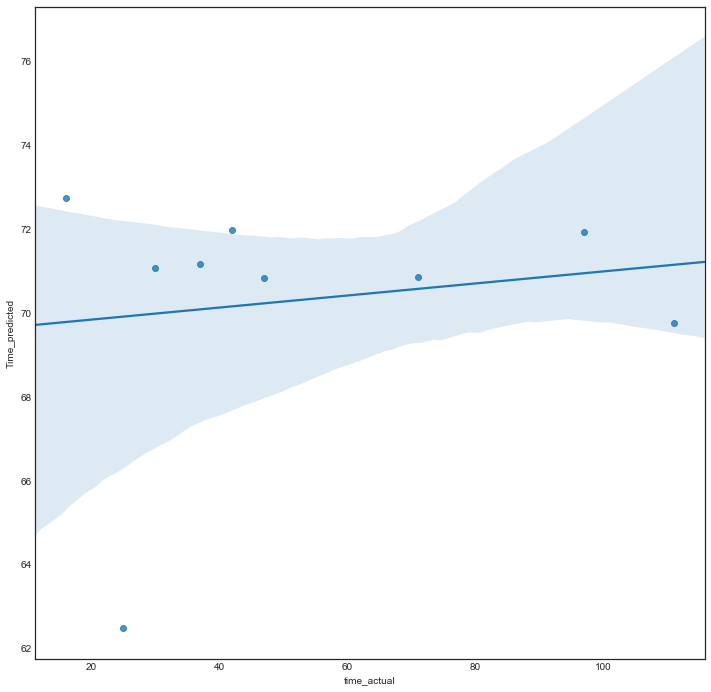

In [91]:
# To plotk the predicted vs actual using deep learning.

fig, ax = plt.subplots(figsize=(12, 12))

sns.regplot(x="time_actual", y="Time_predicted", data=X_train_outputs_deep_learning)

plt.show()
